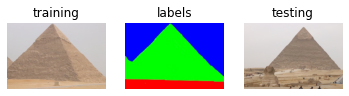

In [1]:
import cv2; #import OpenCV – computer vision functions
import numpy as np; #handle arrays/matrices
import matplotlib.pyplot as plt; #for plotting graphs and showing images
import random;
import math;
import os;import subprocess;import glob;#for generating videos from plots and deleting temporary files
k=5;#no of k clusters
no_iterations=100;#maximum no of iterations in the training process
no_classes=3;#r,g,b -> labels
#====================================================================
centroids=np.zeros([k,3]);#k-means or centroids of the k clusters
orgimg=cv2.imread('pyramid2.jpeg')#training image
img=cv2.cvtColor(orgimg,cv2.COLOR_BGR2RGB);
orgimg_label=cv2.imread('pyramid2_label.jpeg')#training labels
img_label=cv2.cvtColor(orgimg_label,cv2.COLOR_BGR2RGB);
org_test_img=cv2.imread('pyramid1.jpeg')#test image
img_test=cv2.cvtColor(org_test_img,cv2.COLOR_BGR2RGB);
#show the images
plt.subplot(131);plt.imshow(img);plt.title('training');plt.axis('off')
plt.subplot(132);plt.imshow(img_label);plt.title('labels');plt.axis('off');
plt.subplot(133);plt.imshow(img_test);plt.title('testing');plt.axis('off');
plt.show()


In [2]:
#load training data
width=img.shape[1];height=img.shape[0];
No_training_samples=1000;
training_data=np.zeros([No_training_samples,3]);
training_label=np.zeros(No_training_samples);
for i in range(No_training_samples):
    rx=int(random.random()*width);
    ry=int(random.random()*height);
    training_data[i]=img[ry,rx];
    training_label[i]=0;
    if (img_label[ry,rx,0]>200): training_label[i]=0;
    elif(img_label[ry,rx,1]>200):training_label[i]=1;
    else:training_label[i]=2;

In [6]:
def distance(vector1, vector2):#Euclidean distance between 2 vectors 
    dist=0.0;
    for i in range(len(vector1)):
        dist += (vector1[i] - vector2[i])**2;
    return math.sqrt(dist);
def FindNewCentroids(clusters,training_data):
#find the new centroids from the clusters of data points
    means=np.zeros(3);
    #calculate the means in each cluster
    for i in range(len(clusters)):
        means+=training_data[clusters[i]];
    result=[0,0,0];
    if (len(clusters)==0):#avoid divide by zeros
        result=[int(random.random()*255),int(random.random()*255),
	int(random.random()*255)];
    else: result=means/len(clusters);#the new centroids
    return result;


In [18]:
def k_means_clustering(no_iterations,k,centroids,noclasses):#find centroids/clusters -> Training
    iteration=0;no_images=0;
    cluster_classes=np.zeros(k);#which class label the cluster should belong to
    prev_centroids=np.zeros([k,3]);#store the last estimated centroids
    for a in range(k):#initialise the centroids with random values
        centroids[a]=[int(random.random()*255),int(random.random()*255),
	int(random.random()*255)];
        cluster_classes[a]=a;#just initialise the labels to the cluster no first
    for j in range(no_iterations):#the stopping criteria - no_iterations
        clusters=np.empty((k,),dtype=object);#define empty clusters
        for a in range(k):clusters[a]=list();#for each cluster, create a list
        for i in range(No_training_samples):
            dist=np.zeros(k);mindist=9999999; whichone=0;
            for a in range(k):#find the distance of the data samples to the centroids
                dist[a]=distance(training_data[i],centroids[a]);
                if (dist[a]<mindist):mindist=dist[a];whichone=a; #the sample is closest to this centroid 
            clusters[whichone].append(i);#add the sample to the cluster with the closest centroid
        #check if the centroids positions are changed -> for stopping the training
        centroids_moved=False;
        for a in range(k):#update the centroid locations with the new clusters
            centroids[a]=FindNewCentroids(clusters[a],training_data);
            if ((centroids[a]!=prev_centroids[a]).any()):centroids_moved=True;#the centroids have moved?
            prev_centroids[a]=centroids[a];#store the centroid locations
        if (centroids_moved==False): break;#done training -> no change of centroid locations
    #find out which class each cluster belongs to -> adding labels to each cluster 
    cluster_classes=np.zeros(k);
    for a in range(k):
        kclass=np.zeros(noclasses);maxcount=0;whichclass=0;
        for b in range(len(clusters[a])):
            pclass=int(training_label[clusters[a][b]]);kclass[pclass]+=1;
            if (kclass[pclass]>=maxcount):#the majority of the samples are in the cluster
                maxcount=kclass[pclass];whichclass=pclass; 
        cluster_classes[a]=whichclass;#assign the class label to the specific centroid 
    return [centroids,cluster_classes,iteration,no_images];#return the centroids and the labels


In [19]:
def kmean_classification(data,k,centroids):#classify the data which cluster it should below to (class)
    dist=np.zeros(k);
    mindist=9999999;
    whichone=0;
    for a in range(k):
        dist[a]=distance(data,centroids[a]);#find the shortest distance between the data and centroid
        if (dist[a]<mindist):
            mindist=dist[a];
            whichone=a;
    return whichone;
def kmeanSegmentation(k,centroids,classes):#segment the image with the k-means (centroids)
    resultimg=img_test.copy();
    for y in range(height):
        for x in range(width):
            label=kmean_classification(img_test[y,x],k,centroids); 
            if (classes[label]==0):resultimg[y,x,0]=255;resultimg[y,x,1]=0;resultimg[y,x,2]=0;
            elif (classes[label]==1):resultimg[y,x,1]=255;resultimg[y,x,2]=0;resultimg[y,x,0]=0;
            else: resultimg[y,x,2]=255;resultimg[y,x,1]=0;resultimg[y,x,0]=0;
    return resultimg; 


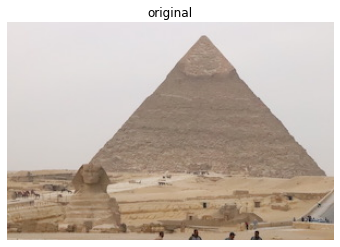

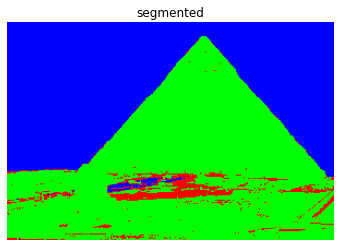

In [20]:
kmeans,classes,act_no_iterations,no_images=k_means_clustering(no_iterations,k,centroids,no_classes);#training the k-means algorithm *note 3 classes r,g,b
resultimg=kmeanSegmentation(k,kmeans,classes);#segment the image with the k-means
#show the results of image segmentation
plt.imshow(img_test);plt.title('original');plt.axis('off');plt.show();
plt.imshow(resultimg);plt.title('segmented');plt.axis('off');plt.show() 
